Alex Gagliano, 05/10/2020

Let's start by importing our required packages.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from astropy.time import Time
from collections import Counter

sns.set_context("talk")
sns.set_style("white")
sns.set_palette("colorblind")


plt.rcParams['xtick.major.size'] = 16
plt.rcParams['ytick.major.size'] = 16

plt.rcParams['xtick.minor.size'] = 8
plt.rcParams['ytick.minor.size'] = 8
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.minor.width'] = 2

plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

t0 = 58854.2

In [12]:
data_lateTime = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/HST_postExplosion.csv", delim_whitespace=True)

In [13]:
data_lateTime = data_lateTime.dropna(how='all', axis=1)

In [14]:
from collections import Counter
Counter(data_lateTime['Filter'])

Counter({'F814W': 3,
         'F438W': 3,
         'F336W': 2,
         'F275W': 2,
         'F555W': 3,
         'F110W': 1,
         'F160W': 1,
         'F625W': 1})

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


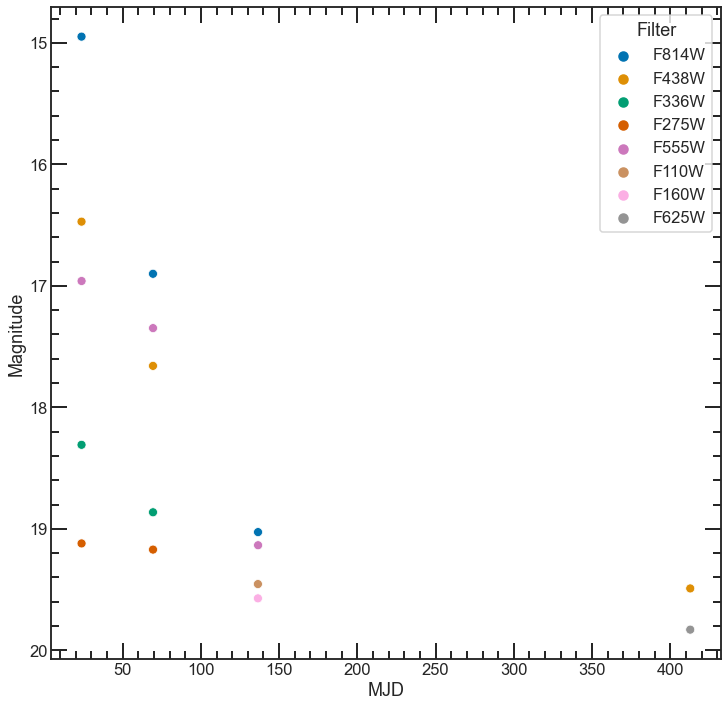

In [15]:
plt.figure(figsize=(12,12))
sns.scatterplot(data_lateTime['MJD']-t0, data_lateTime['Magnitude'], hue=data_lateTime['Filter'])
plt.gca().invert_yaxis()

In [16]:
data_lateTime

,MJD,Instrument,Filter,Exposure,Magnitude,Uncertainty,Limit
0,58877.88502,WFC3/UVIS,F814W,836.0000,14.9492,0.0012,25.6946
1,58877.89008,WFC3/UVIS,F438W,1050.0000,16.4719,0.0012,26.1501
2,58877.89595,WFC3/UVIS,F336W,1110.0000,18.3085,0.0023,26.2859
3,58877.91947,WFC3/UVIS,F275W,2190.0000,19.1201,0.0029,26.5348
4,58877.92975,WFC3/UVIS,F555W,670.0000,16.9604,0.0029,26.4264
5,58923.56552,WFC3/UVIS,F814W,836.0000,16.9010,0.0025,25.6720
6,58923.57058,WFC3/UVIS,F438W,1050.0000,17.6589,0.0018,26.1769
7,58923.57645,WFC3/UVIS,F336W,1110.0000,18.8637,0.0029,26.1496
8,58923.58255,WFC3/UVIS,F275W,2190.0000,19.1709,0.0029,26.3493
9,58923.59282,WFC3/UVIS,F555W,670.0000,17.3481,0.0012,26.2825


In [17]:
BC_B=-0.055-0.240*(B-I)-0.154*(B-I)**2
BC_g=0.054-0.195*(g-r)-0.719*(g-r)**2

NameError: name 'B' is not defined

In [20]:
# First, convert to Johnson I band from SDSS i and z using: 
#I-i   =     (-0.386 ± 0.004)*(i-z) - (0.397 ± 0.001)
#http://www.sdss3.org/dr8/algorithms/sdssUBVRITransform.php
GP_results = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/interpolated_lcs/GPResults_2020oi_LateTime.csv")
    
SN2020oi_i = GP_results['i_LC']
SN2020oi_z =  GP_results['z_LC']
SN2020oi_V =  GP_results['V_LC']
SN2020oi_I_min_i = -0.386*(SN2020oi_i - SN2020oi_z) - 0.397
SN2020oi_I = SN2020oi_I_min_i + SN2020oi_i

In [21]:
SN2020oi_Istd = np.sqrt(GP_results['i_std']**2 + GP_results['z_std']**2)

(0.0, 50.0)

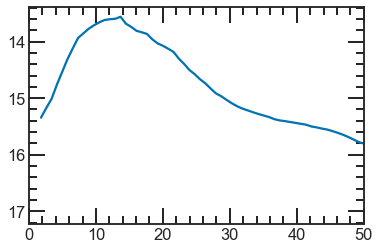

In [22]:
plt.plot(GP_results['MJD']-t0, SN2020oi_I)
plt.gca().invert_yaxis()
plt.xlim((0, 50))

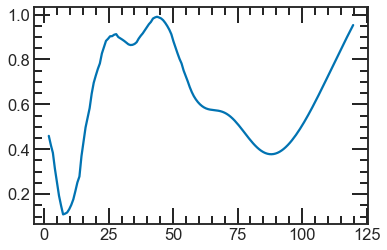

In [23]:
plt.plot(GP_results['MJD']-t0, SN2020oi_V - SN2020oi_I)

In [24]:
#F814W, F438W, F555W
#approximate conversions taken from https://iopscience.iop.org/article/10.3847/1538-3881/aaedb8/pdf
#y = a0 + a1*x + a2*x**2

HST_814 = data_lateTime[data_lateTime['Filter'] == 'F814W']
HST_438 = data_lateTime[data_lateTime['Filter'] == 'F438W']
HST_555 = data_lateTime[data_lateTime['Filter'] == 'F555W']

#(I-F814W) = 0  if (V-I) < 1.2
#(I-F814W) = -0.130 + 0.108*(V-I) if (V-I) > 1.2
#so we're fine!

In [25]:
z = np.polyfit(HST_814['MJD']-t0, HST_814['Magnitude'], 1)
p = np.poly1d(z)
p(59275-t0)

29.287521262696433

In [26]:
z

array([ 0.03580933, 14.21895331])

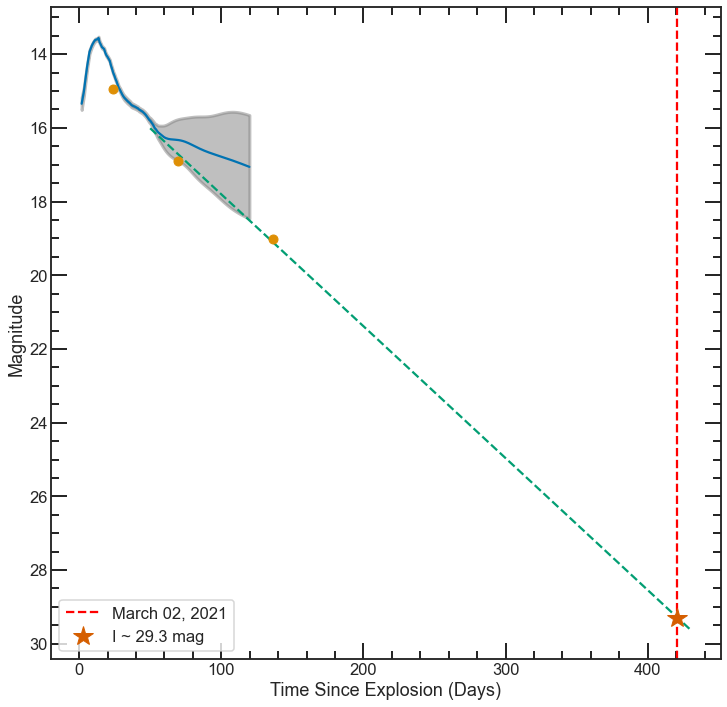

In [29]:
plt.figure(figsize=(12,12))
plt.xlabel("Time Since Explosion (Days)")
plt.ylabel("Magnitude")
plt.plot(GP_results['MJD']-t0, SN2020oi_I)
plt.fill_between(GP_results['MJD']-t0, SN2020oi_I-SN2020oi_Istd,SN2020oi_I+SN2020oi_Istd,lw=3, alpha=0.5, color='grey')
plt.errorbar(HST_814['MJD']-t0, HST_814['Magnitude'], HST_814['Uncertainty']+0.1, fmt='o')
#plot current date, 03/02/2021
plt.axvline(x=59275-t0, c='r', ls='--', label='March 02, 2021')
plt.plot(np.linspace(50, 430), p(np.linspace(50, 430)), ls='--')
plt.plot([59275-t0], [29.287521262696433], '*', label='I ~ 29.3 mag',ms=20)
plt.legend()
plt.gca().invert_yaxis()

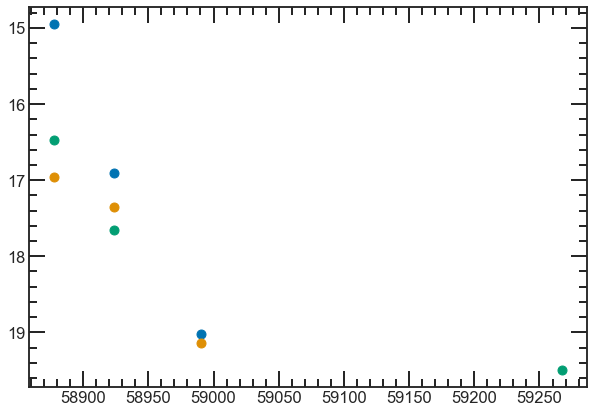

In [31]:
plt.figure(figsize=(10,7))
plt.errorbar(HST_814['MJD'], HST_814['Magnitude'], HST_814['Uncertainty'], fmt='o')
plt.errorbar(HST_555['MJD'], HST_555['Magnitude'], HST_555['Uncertainty'], fmt='o')
plt.errorbar(HST_438['MJD'], HST_438['Magnitude'], HST_438['Uncertainty'], fmt='o')
plt.gca().invert_yaxis()

In [24]:
SN2020oi = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/data_wLateTime.csv")
SN2020oi.sort_values(by=['MJD'], inplace=True)
SN2020oi.loc[SN2020oi['ULIM'] != SN2020oi['ULIM'], 'ULIM'] = 0

# From https://www.stsci.edu/hst/wfpc2/Wfpc2_dhb/wfpc2_ch52.html:
The WFPC2 filters do not have exact counterparts in the standard filter sets. For example, while F555W and F814W are reasonable approximations of Johnson V and Cousins I respectively, neither match is exact, and the differences can amount to 0.1 mag, clearly significant in precise photometric work.